In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
print("Step 1: Libraries imported successfully.\n")


Step 1: Libraries imported successfully.



In [4]:
# Step 2: Data Collection
df = pd.read_csv('heart.csv')
print("Step 2: Dataset loaded successfully.")
print("First 5 rows of the dataset:")
print(df.head(), "\n")

Step 2: Dataset loaded successfully.
First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   



In [5]:
# Step 3: Data Cleaning
print("Step 3: Data Cleaning")
# Check missing values
print("Missing values in each column:")
print(df.isnull().sum(), "\n")
df.dropna(inplace=True)
print("Dropped missing values (if any). Shape:", df.shape)


Step 3: Data Cleaning
Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

Dropped missing values (if any). Shape: (303, 14)


In [6]:
# Drop duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates}")
df = df.drop_duplicates()
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}\n")

Number of duplicate rows before dropping: 1
Number of duplicate rows after dropping: 0



In [8]:
# Check data types
print("Data types before correction:")
print(df.dtypes, "\n")
print('Here all features are numerical, so no conversion required.')
print("Data types after checking:")
print(df.dtypes, "\n")

Data types before correction:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object 

Here all features are numerical, so no conversion required.
Data types after checking:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object 



Step 4: Data Visualization


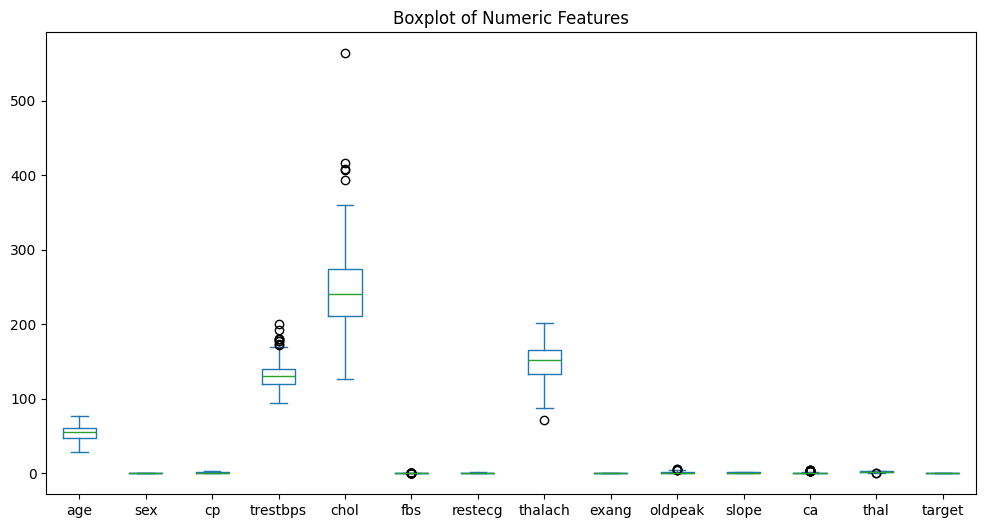

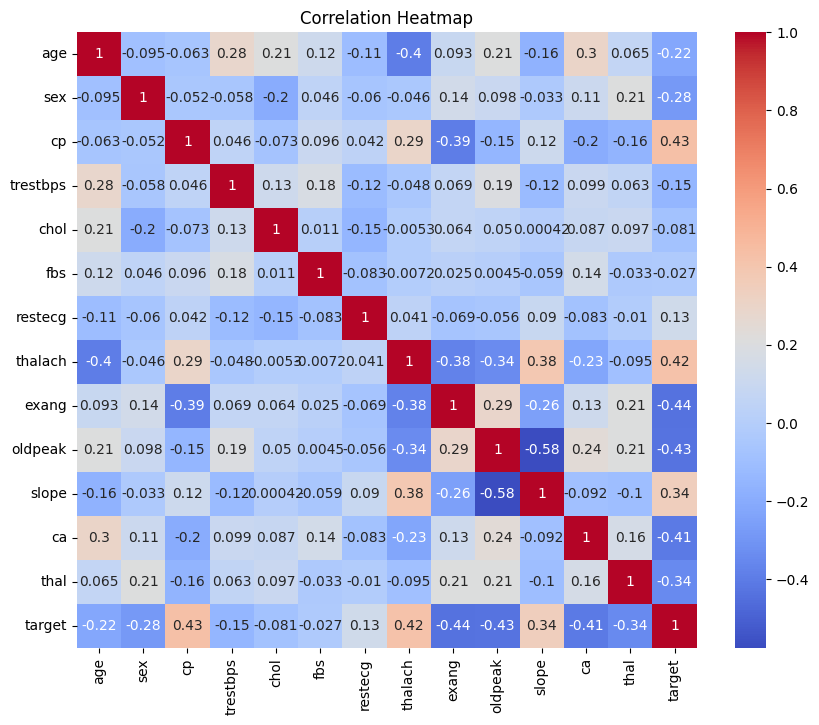

In [9]:
# Step 4: Data Visualization
print("Step 4: Data Visualization")
# Boxplot to check distribution of numerical features
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].plot(kind='box', figsize=(12,6), title='Boxplot of Numeric Features')
plt.show()
# Heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Step 5: Data Transformation
print("Step 5: Data Transformation")
# Normalize/scale numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Numeric features normalized.")
# Encode categorical variables if any (e.g., 'sex', 'cp', etc.)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
  for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    print("Categorical variables encoded:", list(categorical_cols))
else:
  print("No categorical variables to encode.")


Step 5: Data Transformation
Numeric features normalized.
No categorical variables to encode.


In [14]:
# Create derived features – Example: here we simulate using 'thalach' max heart rate
# We'll create a new feature 'heart_rate_category' based on 'thalach'
df['heart_rate_category'] = pd.qcut(df['thalach'], q=3, labels=['Low', 'Medium', 'High'])
print("Derived feature 'heart_rate_category' created.\n")

Derived feature 'heart_rate_category' created.



In [15]:
# Step 6: Data Integration
print("Step 6: Data Integration")
# Simulate a secondary dataset – demographic info
demographic_data = pd.DataFrame({
 'age': df['age'],
 'demographic_factor': np.random.choice(['Urban', 'Rural'], size=df.shape[0])
})


Step 6: Data Integration


In [16]:
# Merge the datasets
df = pd.merge(df, demographic_data, on='age', how='left')
print("Merged with demographic dataset.")
print("First 5 rows after merging:")
print(df.head(), "\n")

Merged with demographic dataset.
First 5 rows after merging:
        age       sex       cp  trestbps      chol       fbs   restecg  \
0  0.949794  0.682656  1.97647  0.764066 -0.261285  2.389793 -1.002541   
1  0.949794  0.682656  1.97647  0.764066 -0.261285  2.389793 -1.002541   
2  0.949794  0.682656  1.97647  0.764066 -0.261285  2.389793 -1.002541   
3  0.949794  0.682656  1.97647  0.764066 -0.261285  2.389793 -1.002541   
4  0.949794  0.682656  1.97647  0.764066 -0.261285  2.389793 -1.002541   

    thalach     exang   oldpeak     slope        ca      thal    target  \
0  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313   
1  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313   
2  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313   
3  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313   
4  0.018826 -0.698344  1.084022 -2.271182 -0.714911 -2.147955  0.917313   

  heart_rate_category demographic_factor  


In [17]:
# Step 7: Save Final Dataset
print("Step 7: Save Final Dataset")
output_file = "heart_cleaned.csv"
df.to_csv(output_file, index=False)
print(f"Final cleaned and transformed dataset saved as '{output_file}'.")

Step 7: Save Final Dataset
Final cleaned and transformed dataset saved as 'heart_cleaned.csv'.
